In [1]:
import obspy
import pandas as pd
aefcat = pd.read_pickle('../../data/catalogs/MBWH.aef.fixed.pkl')
badrows = []
dates = []
times = []
for i,row in aefcat.iterrows():
    d=row['date']
    t=row['time']
    try:
        thisdate = obspy.UTCDateTime("%s/%s/%s %s:%s:%s" %(d[0:4], d[5:7], d[8:10], t[0:2], t[3:5], t[6:8])).datetime
        dates.append(thisdate)
    except:
        badrows.append(i)
aefcat.drop(badrows, inplace=True)
aefcat['date']=dates
aefcat.drop(columns=['time'], inplace=True)
print(aefcat)
aefcat.to_pickle('../../data/catalogs/MBWH.aef.fixed.datetime.pkl')

                      date subclass    amp      eng  peakf    F0    F1    F2  \
0      1996-11-01 03:58:41        r  0.244  0.00008   5.43   9.0  10.0  10.0   
1      1996-11-01 04:27:09        h  0.743  0.00065   1.74   3.0  29.0  14.0   
2      1996-11-01 05:23:13        h  0.803  0.00069   1.74   3.0  43.0  17.0   
3      1996-11-01 05:46:18        r  0.649  0.00072   3.92   4.0   8.0  11.0   
4      1996-11-01 06:01:33        h  0.209  0.00005   1.84  10.0  49.0  12.0   
...                    ...      ...    ...      ...    ...   ...   ...   ...   
112322 2001-06-27 13:48:23        n  0.635  0.00040   2.01     4  22.0  51.0   
112323 2001-06-27 14:30:23        n  0.788  0.00093   2.22     2  11.0  42.0   
112324 2001-06-27 15:42:16        n  0.887  0.00060   1.74     2  23.0  41.0   
112325 2001-06-27 17:12:43        e  1.790  0.00644   2.98     1  21.0  38.0   
112326 2001-06-27 18:00:30        r  3.070  0.01160   2.00     0  25.0  50.0   

          F3    F4    F5    F6   F7   F

<Axes: xlabel='date'>

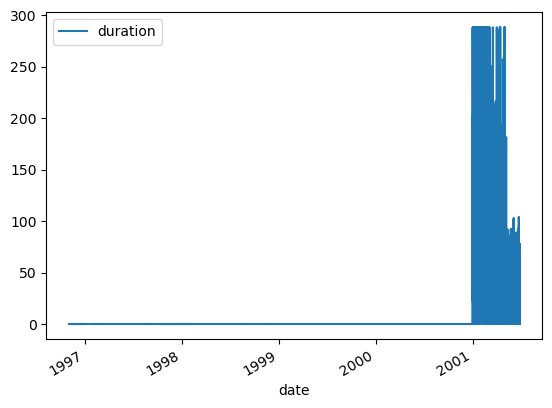

In [2]:
aefcat.plot(x='date', y='duration')

/home/thompsong/miniconda3/envs/skience24/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='date', ylabel='mag'>

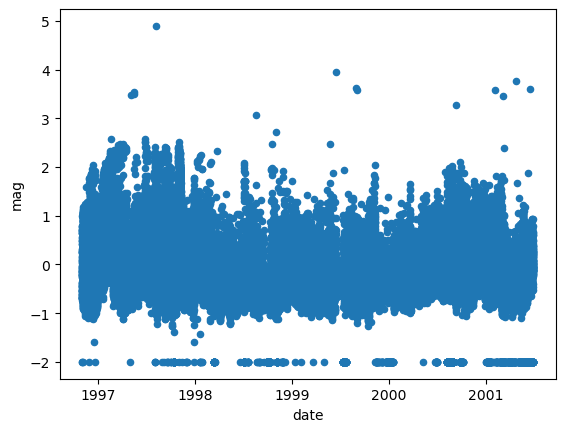

In [3]:
import numpy as np
aefcat['mag'] = np.log10(aefcat['amp'])
aefcat.loc[aefcat["mag"] < -2.0, "mag"] = -2.0
aefcat.plot.scatter(x='date', y='mag')

In [4]:
mbwhdatcat = pd.read_pickle('../../data/catalogs/mbwh_subclass_magnitude_sorted.pkl')
print(mbwhdatcat)
mbwhdatcat['date'] = pd.to_datetime(mbwhdatcat[['year', 'month', 'day', 'hour', 'minute', 'second']])

        year  month  day  hour  minute  second subclass   emag
0       1996     10   23    20       7      11        r   1.21
1       1996     10   23    22      35      49        e   1.24
2       1996     10   23    23      42      17        r   0.55
3       1996     10   23    23      51       4        r   0.22
4       1996     10   23    23      59      24        r   0.42
...      ...    ...  ...   ...     ...     ...      ...    ...
182661  2004      1   31     2       1       5        l   1.18
182662  2004      1   31     3      11      17        h -99.90
182663  2004      1   31     4       0      42        m   1.09
182664  2004      1   31     7      54       7        l -99.90
182665  2004      1   31     8      58      47        l -99.90

[182666 rows x 8 columns]


In [5]:
print(mbwhdatcat)

        year  month  day  hour  minute  second subclass   emag  \
0       1996     10   23    20       7      11        r   1.21   
1       1996     10   23    22      35      49        e   1.24   
2       1996     10   23    23      42      17        r   0.55   
3       1996     10   23    23      51       4        r   0.22   
4       1996     10   23    23      59      24        r   0.42   
...      ...    ...  ...   ...     ...     ...      ...    ...   
182661  2004      1   31     2       1       5        l   1.18   
182662  2004      1   31     3      11      17        h -99.90   
182663  2004      1   31     4       0      42        m   1.09   
182664  2004      1   31     7      54       7        l -99.90   
182665  2004      1   31     8      58      47        l -99.90   

                      date  
0      1996-10-23 20:07:11  
1      1996-10-23 22:35:49  
2      1996-10-23 23:42:17  
3      1996-10-23 23:51:04  
4      1996-10-23 23:59:24  
...                    ...  
1826

In [6]:
mbwhdatcat.to_pickle('../../data/catalogs/mbwh_subclass_magnitude_sorted.datetime.pkl')

In [14]:
aefcat.set_index('date',inplace=True)
mbwhdatcat.set_index('date',inplace=True)
aef_emag_cat = aefcat.merge(mbwhdatcat, left_index=True, right_index=True, how='inner')
print(aef_emag_cat)

                    subclass_x    amp      eng  peakf    F0    F1    F2    F3  \
date                                                                            
1996-11-01 03:58:41          r  0.244  0.00008   5.43   9.0  10.0  10.0  10.0   
1996-11-01 04:27:09          h  0.743  0.00065   1.74   3.0  29.0  14.0  13.0   
1996-11-01 05:23:13          h  0.803  0.00069   1.74   3.0  43.0  17.0  13.0   
1996-11-01 05:46:18          r  0.649  0.00072   3.92   4.0   8.0  11.0  28.0   
1996-11-01 06:01:33          h  0.209  0.00005   1.84  10.0  49.0  12.0   5.0   
...                        ...    ...      ...    ...   ...   ...   ...   ...   
2001-06-27 13:48:04          r  0.000  0.00000   0.00     0   0.0   0.0   0.0   
2001-06-27 13:48:23          n  0.635  0.00040   2.01     4  22.0  51.0   9.0   
2001-06-27 14:30:23          n  0.788  0.00093   2.22     2  11.0  42.0  22.0   
2001-06-27 15:42:16          n  0.887  0.00060   1.74     2  23.0  41.0  18.0   
2001-06-27 18:00:30         

In [15]:
aef_emag_cat.reset_index(inplace=True)

(-2.0, 5.0)

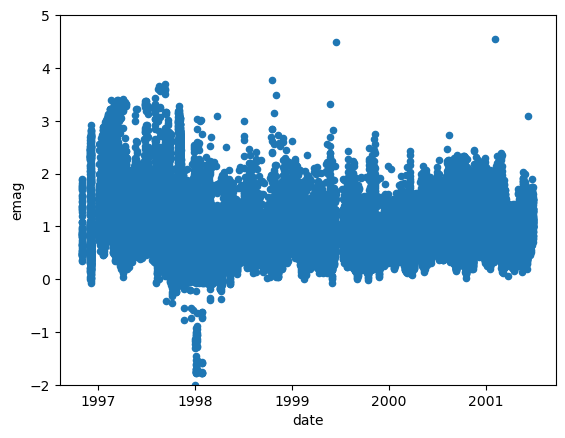

In [17]:
ax = aef_emag_cat.plot.scatter(x='date', y='emag')
ax.set_ylim([-2, 5])

In [18]:
aef_emag_cat.to_pickle('../../data/catalogs/mbwh_subclass_aef_emag.pkl')

In [19]:
print(aef_emag_cat)

                      date subclass_x    amp      eng  peakf    F0    F1  \
0      1996-11-01 03:58:41          r  0.244  0.00008   5.43   9.0  10.0   
1      1996-11-01 04:27:09          h  0.743  0.00065   1.74   3.0  29.0   
2      1996-11-01 05:23:13          h  0.803  0.00069   1.74   3.0  43.0   
3      1996-11-01 05:46:18          r  0.649  0.00072   3.92   4.0   8.0   
4      1996-11-01 06:01:33          h  0.209  0.00005   1.84  10.0  49.0   
...                    ...        ...    ...      ...    ...   ...   ...   
102169 2001-06-27 13:48:04          r  0.000  0.00000   0.00     0   0.0   
102170 2001-06-27 13:48:23          n  0.635  0.00040   2.01     4  22.0   
102171 2001-06-27 14:30:23          n  0.788  0.00093   2.22     2  11.0   
102172 2001-06-27 15:42:16          n  0.887  0.00060   1.74     2  23.0   
102173 2001-06-27 18:00:30          r  3.070  0.01160   2.00     0  25.0   

          F2    F3    F4  ...  duration       mag  year  month  day  hour  \
0       10

(-2.0, 5.0)

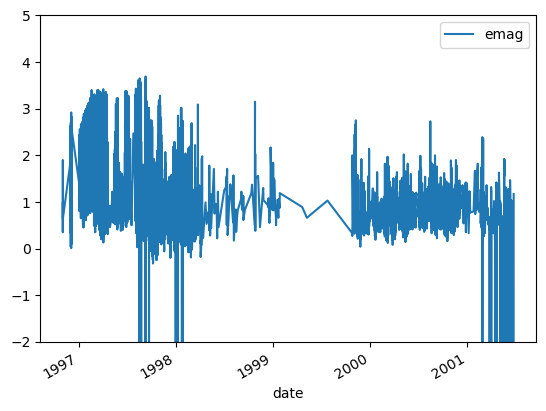

In [21]:
df_h = aef_emag_cat[aef_emag_cat['subclass_x']=='h']
ax2=df_h.plot(x='date', y='emag')
ax2.set_ylim([-2, 5])